# Simple Linear Regression

In [37]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from matplotlib import pyplot as plt 

In [4]:
df = pd.read_csv("placement2.csv")

In [5]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [6]:
df.shape

(200, 2)

In [7]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [8]:
X = df[['cgpa']]
y = df['package']

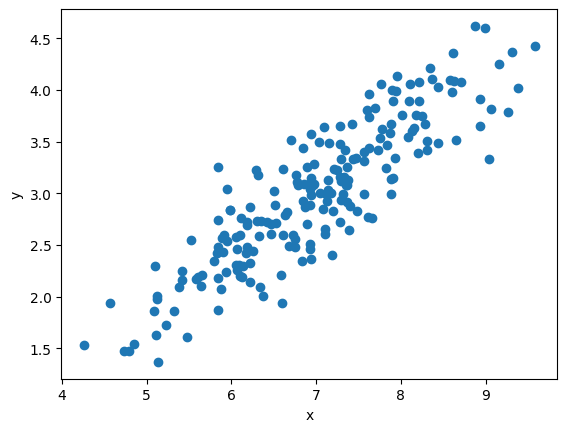

In [9]:
plt.scatter(X , y )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)
X_train.shape

(160, 1)

In [11]:
lr = LinearRegression()
lr.fit(X_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
X_test.values[0]

array([6.63])

In [13]:
y_test.values[1]

np.float64(3.23)

In [14]:
y_pred = lr.predict(X_test)
y_pred

array([2.78031348, 3.13635249, 3.1995207 , 2.38981908, 3.52684689,
       3.76803461, 3.16506531, 2.54486832, 3.17655044, 3.4923915 ,
       1.90744364, 2.34962112, 3.6876387 , 2.75734322, 3.47516381,
       3.04447145, 2.32665086, 3.20526327, 2.17734418, 3.314372  ,
       2.45298729, 2.90090734, 3.32011456, 2.87219451, 3.33734226,
       2.19457187, 1.41932564, 2.7114027 , 3.18229301, 2.32665086,
       3.74506435, 2.95833298, 3.68189614, 2.97556068, 2.59080884,
       3.34882738, 2.47595755, 3.07318428, 4.17575671, 2.95833298])

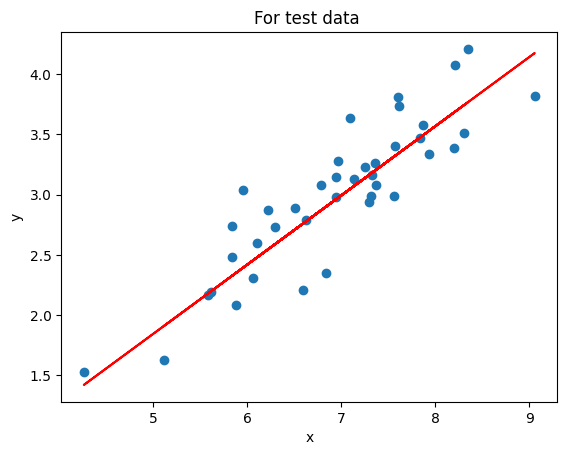

In [15]:
plt.scatter(X_test , y_test )
plt.plot(X_test ,y_pred , c='r')
plt.xlabel("x")
plt.ylabel("y")
plt.title("For test data ")
plt.show()

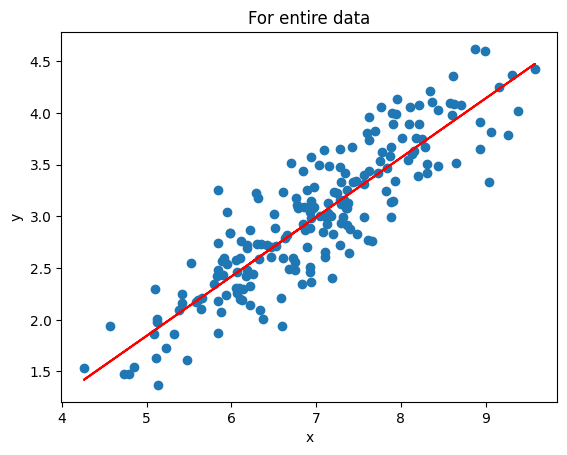

In [16]:
plt.scatter(X , y )
plt.plot(X ,lr.predict(X) , c='r')
plt.xlabel("x")
plt.ylabel("y")
plt.title("For entire data")
plt.show()

Mean Absolute Error , Mean Squared Error , Root Mean Square Error , R2-Score , Adjusted R2-Score

In [17]:
from sklearn.metrics import accuracy_score , mean_absolute_error, mean_squared_error, r2_score


In [18]:
y_pred = lr.predict(X_test)
y_pred

array([2.78031348, 3.13635249, 3.1995207 , 2.38981908, 3.52684689,
       3.76803461, 3.16506531, 2.54486832, 3.17655044, 3.4923915 ,
       1.90744364, 2.34962112, 3.6876387 , 2.75734322, 3.47516381,
       3.04447145, 2.32665086, 3.20526327, 2.17734418, 3.314372  ,
       2.45298729, 2.90090734, 3.32011456, 2.87219451, 3.33734226,
       2.19457187, 1.41932564, 2.7114027 , 3.18229301, 2.32665086,
       3.74506435, 2.95833298, 3.68189614, 2.97556068, 2.59080884,
       3.34882738, 2.47595755, 3.07318428, 4.17575671, 2.95833298])

In [23]:
y_test.values

array([2.79, 3.23, 3.26, 3.04, 3.34, 4.21, 2.94, 2.87, 2.99, 3.58, 1.63,
       2.08, 4.08, 2.21, 3.47, 3.64, 2.74, 3.08, 2.17, 2.99, 2.31, 2.35,
       3.4 , 3.08, 3.81, 2.19, 1.53, 2.89, 3.16, 2.48, 3.51, 2.98, 3.39,
       3.28, 2.73, 3.74, 2.6 , 3.13, 3.82, 3.15])

In [ ]:
print("MAE:" , mean_absolute_error(y_test , y_pred))   # has the unit of output column unit

MAE: 0.23150985393278373


In [ ]:
print("MSE:" , mean_squared_error(y_test , y_pred))  # has the unit of square of output unit

MSE: 0.08417638361329656


In [ ]:
print("RMSE:", np.sqrt(mean_squared_error(y_test , y_pred)))  # has the unit of output column unit

RMSE: 0.2901316659954521


In [ ]:
print("r2 score:" , r2_score(y_test, y_pred))  # dimension less ( close to 1 r2_score is good)
r2 = r2_score(y_test, y_pred)                # close to zero r2 score means it is not a good model

r2 score: 0.7730984312051673


In [34]:
X_test.shape

(40, 1)

In [35]:
adjusted_r2_score = 1-((1-r2)*(40-1)/(40-1-1))
print(adjusted_r2_score)

0.7671273372895138


In [36]:
# If we add some random column in feature which is not having any impact on output column then 
# r2 score increase but adjusted r2 score decreases 
# if we add a column which is affecting the output column ( like if we add iq in this df then it will create its impact on output)
# then again r2 score increase and as well as adjusted r2 score also increases .

# Multiple Linear Regression

In [40]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import plotly.express as px

In [41]:
X , y = make_regression(n_features=2 , n_samples=200 , n_informative=2 , noise=50 ,n_targets=1)

df= pd.DataFrame({'feuture1':X[:,0] , 'feature2': X[:,1] , 'target':y})

In [42]:
df.shape

(200, 3)

In [43]:
df.head()

,feuture1,feature2,target
0,0.420356,-0.368062,61.725735
1,-0.868361,-2.010410,-249.291613
2,-1.308108,-1.482137,-200.195545
3,0.082480,0.671028,43.562332
4,-0.519842,-1.522719,-129.849121


In [44]:
fig = px.scatter_3d(df,x=df['feuture1'] , y=df['feature2'] , z=df['target'])
fig.show()

In [ ]:
X= df.iloc[:,0:2]
y = df.iloc[:,2]

In [45]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=43)

In [46]:
X_train.shape

(160, 2)

In [47]:
lr = LinearRegression()
lr.fit(X_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
y_pred = lr.predict(X_test)

In [49]:
print("MAE:" , mean_absolute_error(y_test , y_pred))
print("MSE:" , mean_squared_error(y_test , y_pred))
print("R2 Score:" , r2_score(y_test , y_pred))

MAE: 44.35349814381343
MSE: 2640.2326327903234
R2 Score: 0.8683702464022038


In [50]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(y, x)
final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T
z_final = lr.predict(final).reshape(10,10)

z = z_final
#final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

In [53]:
import plotly.graph_objects as go

fig = px.scatter_3d(df,x=df['feuture1'] , y=df['feature2'] , z=df['target'])

fig.add_trace(go.Surface(x = x, y = y, z =z ))

fig.show()

In [54]:
lr.coef_   # this will give m ,n (slope) z = mx+ny+b

array([62.90423562, 86.81615689])

In [55]:
lr.intercept_   # this will give b

np.float64(5.352165666088551)